# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Importing Libraries:

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [421]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [422]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [423]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [424]:
train.SalePrice.describe()
train.shape

(1460, 81)

In [425]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Data preparation methods:

#### Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness.

Skew is: 1.88287575977


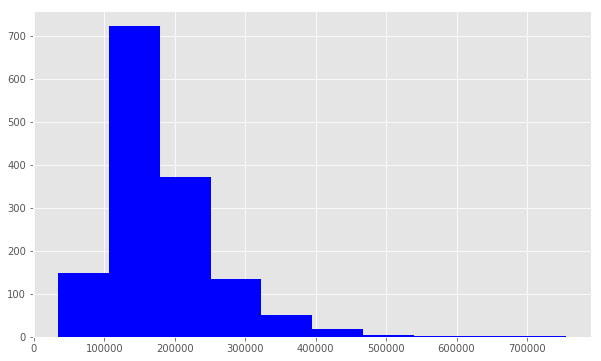

In [426]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We apply log function to have zero skew 

Skew is: 0.121335062205


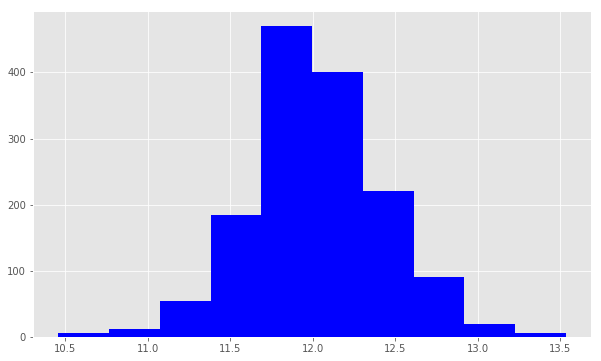

In [427]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Features engineering :

Same transformations should be applied on the training and testing data when doing features engineering.

### Handling non-numerical features :

In [428]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [429]:
#for feature in categoricals:
    #print ("Unique values of ",feature," : " , train[feature].unique())

#### Use of One-Hot encoding:

One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.
we generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample. Hence, the term one hot encoding.

#### Street feature:

In [430]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [431]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [432]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


In [433]:
train.shape

(1460, 82)

#### SaleCondition feature:

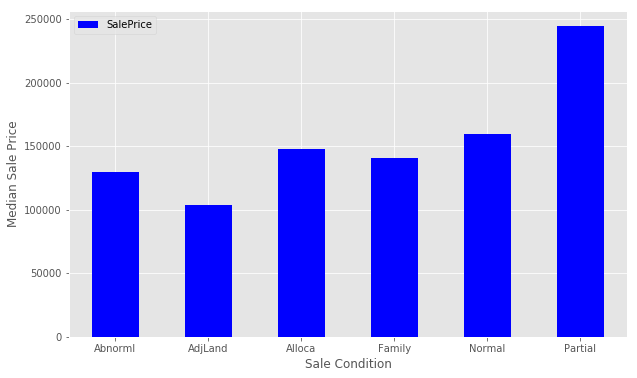

In [434]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

we do the same for sale condition, we notice that partial has the highest median ( value of sale price which is the target value ) so we create another feature called enc_condition and we assign 1 to samples who have this value and 0 to others

In [435]:
# do the same with other features

In [436]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

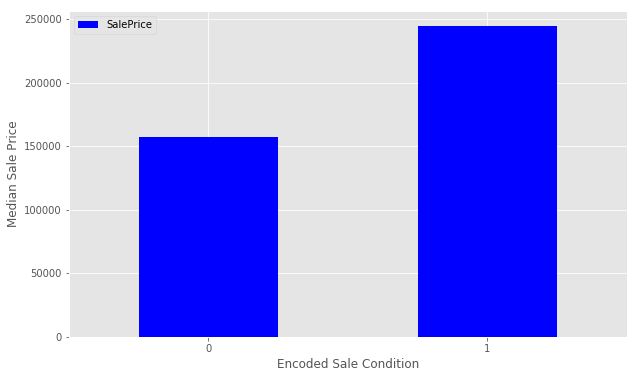

In [437]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [438]:
train.shape

(1460, 83)

#### GarageArea feature:

GarageArea: Size of garage in square feet


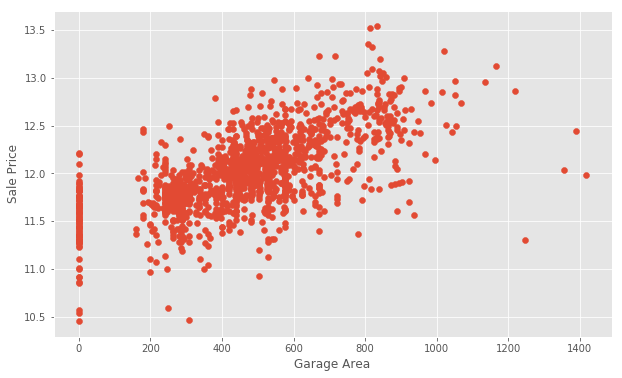

In [439]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [440]:
train = train[train['GarageArea'] < 1200]
#test = test[test['GarageArea'] < 1200]

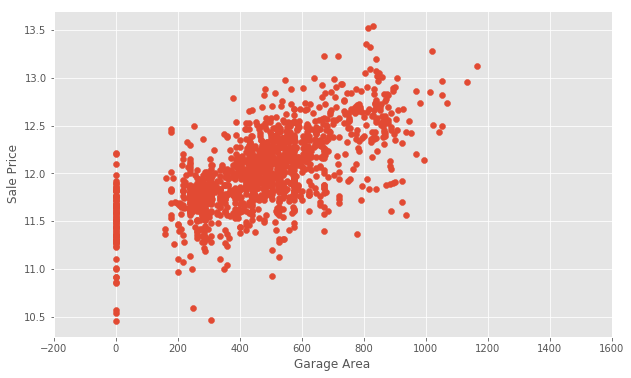

In [441]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#### GarageCars:

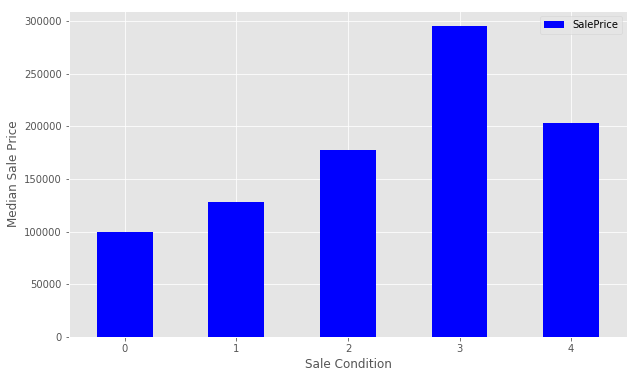

In [442]:
garage_cars_pivot = train.pivot_table(index='GarageCars',
                                    values='SalePrice', aggfunc=np.median)
garage_cars_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [443]:
def encode(x): return 1 if x == 3 else 0
train['enc_garageCars'] = train.GarageCars.apply(encode)
test['enc_garageCars'] = test.GarageCars.apply(encode)

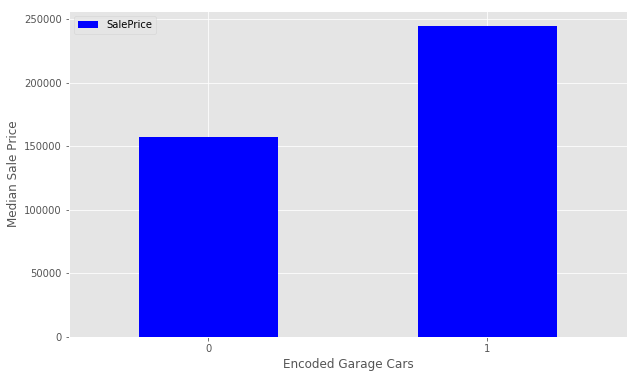

In [444]:
garageCars_pivot = train.pivot_table(index='enc_garageCars', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Garage Cars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [445]:
train.shape

(1455, 84)

In [446]:
#making a copy of data with only numericl values
train_set = train.select_dtypes(include=[np.number])
test_set = test.select_dtypes(include=[np.number])

### Methods to handle Null values :

In [447]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls

#### Interpolation

we fill the missing values with an average value.

In [448]:
data_train_interpolated = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data_train_interpolated.isnull().sum() != 0)
data_train_interpolated.shape

(1455, 41)

In [449]:
data_test_interpolated = test.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data_test_interpolated.isnull().sum() != 0)

0

#### Imputing:  
to replace the null value with : 

* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

In [450]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
train_set = train_set.drop(['SalePrice', 'Id'], axis=1)

train_with_imputed_values = my_imputer.fit_transform(train_set)
test_with_imputed_values = my_imputer.fit_transform(test_set)

We can also fill with zero :

In [451]:
data_with_zeros_train = train_set.fillna(0)
data_with_zeros_test = test_set.fillna(0)

We can drop them,but it's not a recomanded method, because there is a possibility that the test set will have missing values in places where the training data did not, this will result in an error.

## Building the model:

### Linear Regression:

We can use with it Ridge Regularization: a process which shrinks the regression coefficients of less important features.http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* loop diffrent values of alpha
* add more features


In [452]:
# saving Id 
train_id = train['Id']
test_id = test['Id']

In [453]:
# apply log again (because we used skew before)
y = np.log(train.SalePrice)
X = data_train_interpolated.drop(['SalePrice', 'Id'], axis=1)

train_test_split() returns four objects:

* X_train is the subset of our features used for training.
* X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.
* y_train is the target variable SalePrice which corresponds to X_train.
* y_test is the target variable SalePrice which corresponds to X_test. 

random_state=42 allow reproducible results.

In [454]:
from sklearn.model_selection import train_test_split
#first option
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, random_state=42, test_size=.33)
#second option
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                    train_with_imputed_values, y, random_state=42, test_size=.33)

In [455]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [456]:
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.0856852848759


In [457]:
print ("R^2 is: \n", my_model.score(X_test, y_test))


R^2 is: 
 0.900390589706


In [458]:
learning_rates = np.arange(0.0, 0.09, 0.0015)
learning_rates

best_learning_rates = [0.0885, 0.0735, 0.0705, 0.0615, 0.06, 0.0585, 0.057, 0.0555]

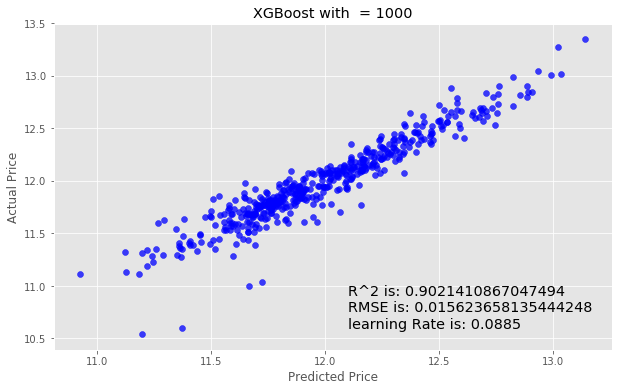

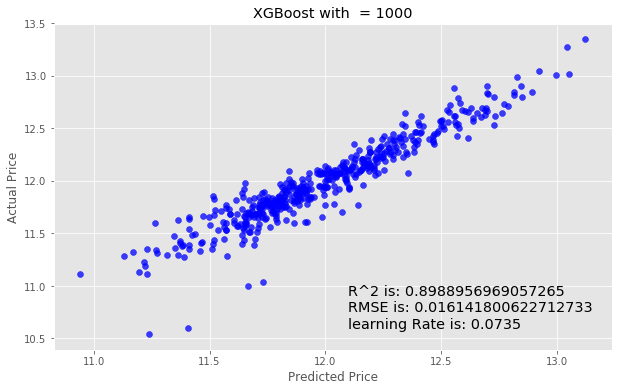

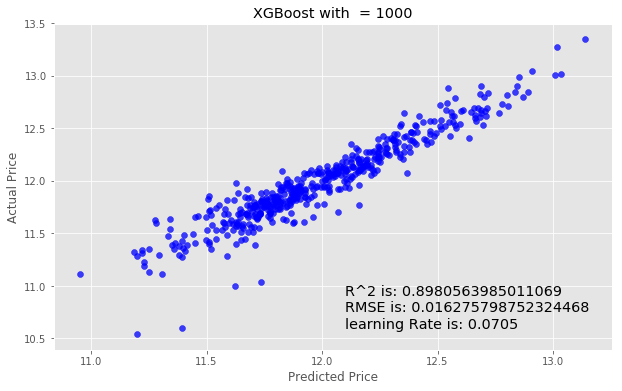

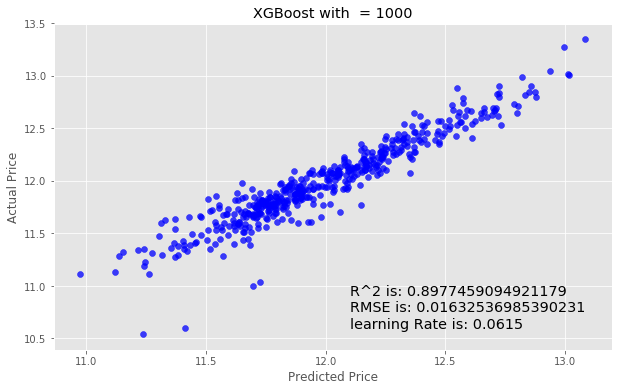

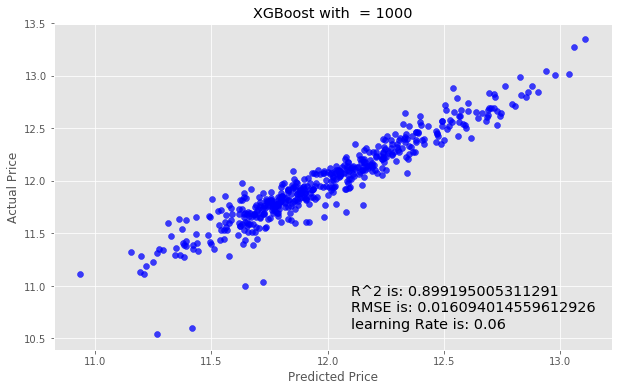

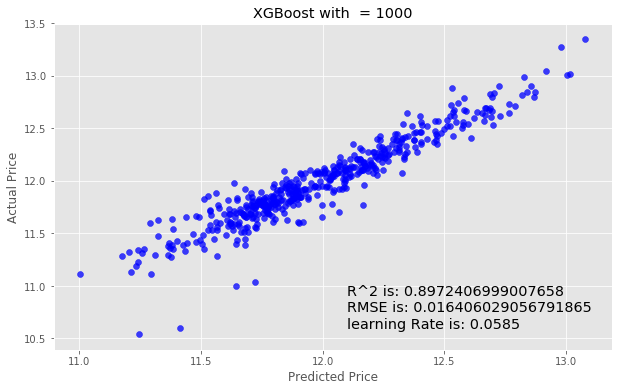

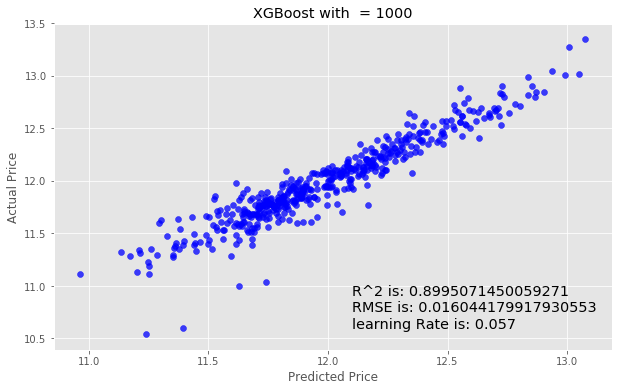

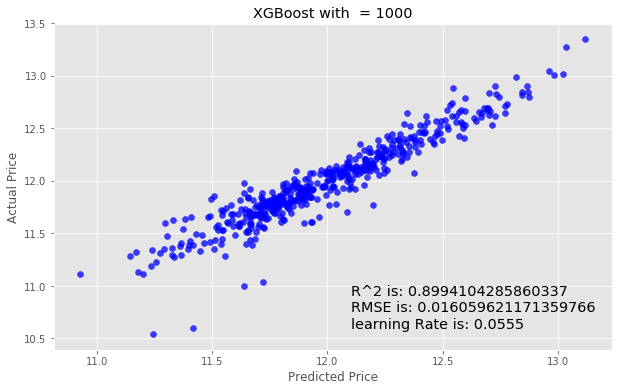

In [459]:

actual_values = y_test

for i in best_learning_rates:
    n_estimators = 1000
    my_model = XGBRegressor(n_estimators=n_estimators,learning_rate=i)
    xgboost_model = my_model.fit(X_train, y_train, early_stopping_rounds=5, 
                 eval_set=[(X_test, y_test)], verbose=False)
    preds_xgboost = xgboost_model.predict(X_test)

    plt.scatter(preds_xgboost, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('XGBoost with  = {}'.format(n_estimators))
    overlay = 'R^2 is: {}\nRMSE is: {}\nlearning Rate is: {}'.format(
                        xgboost_model.score(X_test, y_test),
                        mean_squared_error(y_test, preds_xgboost),
                        i)
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    


### More algorithms:

In [460]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import lightgbm as lgb


In [461]:
# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)
print ("R^2 is: \n", lasso.score(X_test, y_test))

R^2 is: 
 0.888719643959


In [462]:
# Elastic Net regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train, y_train)
print ("R^2 is: \n", ENet.score(X_test, y_test))

R^2 is: 
 0.888720721888


In [463]:
# Gradient boosting regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)
print ("R^2 is: \n", GBoost.score(X_test, y_test))

R^2 is: 
 0.903853524425


In [464]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [465]:
model_lgb.fit(X_train, y_train)
print ("R^2 is: \n", model_lgb.score(X_test, y_test))

R^2 is: 
 0.900087679256


In [466]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [467]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb, lasso))

averaged_models.fit(X_train, y_train)
print ("R^2 is: \n", averaged_models.score(X_test, y_test))

R^2 is: 
 0.905656585387


### Making a submission

In [468]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [469]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [470]:
predictions = averaged_models.predict(feats)
final_predictions = np.exp(predictions)

In [471]:
submission['SalePrice'] = final_predictions
submission.head()
submission.shape


(1459, 2)

In [472]:
submission.to_csv('submission2.csv', index=False)